In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import json

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [5]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("cali/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 276/276 [00:08<00:00, 32.91it/s]


In [3]:
formatted_metadata = json.dumps(tk.metadata.to_dict(), indent=4)
print(formatted_metadata)

{
    "cali.caliper.version": {
        "1793904175": "2.11.0"
    },
    "mpi.world.size": {
        "1793904175": 32
    },
    "spot.metrics": {
        "1793904175": "min#inclusive#sum#time.duration,max#inclusive#sum#time.duration,avg#inclusive#sum#time.duration,sum#inclusive#sum#time.duration,variance#inclusive#sum#time.duration,min#min#aggregate.slot,min#sum#rc.count,avg#sum#rc.count,max#sum#rc.count,sum#sum#rc.count,min#scale#sum#time.duration.ns,max#scale#sum#time.duration.ns,avg#scale#sum#time.duration.ns,sum#scale#sum#time.duration.ns"
    },
    "spot.timeseries.metrics": {
        "1793904175": ""
    },
    "spot.format.version": {
        "1793904175": 2
    },
    "spot.options": {
        "1793904175": "time.variance,profile.mpi,node.order,region.count,time.exclusive"
    },
    "spot.channels": {
        "1793904175": "regionprofile"
    },
    "cali.channel": {
        "1793904175": "spot"
    },
    "spot:node.order": {
        "1793904175": "true"
    },
    "spot:o

View Calltree

In [4]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,scalability,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1793904175,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a65536.cali,true,true,true,true,1729101279,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./bitonicsort, 65536, random]",c,bitonic sort,mpi,int,4,65536,random,32,strong,12,ai


In [6]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

67.971 MPI_Barrier
0.025 MPI_Comm_dup
0.000 MPI_Finalize
0.000 MPI_Finalized
0.000 MPI_Initialized
1.948 main
├─ 1.385 MPI_Bcast
├─ 0.106 comm
│  └─ 0.106 comm_large
│     ├─ 0.074 MPI_Gather
│     └─ 0.033 MPI_Scatter
├─ 0.450 comp
│  └─ 0.450 comp_large
├─ 0.190 correctness_check
└─ 1.407 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 67.97 indices: {'profile': 39530924})
█ 61.17 - 67.97
█ 47.58 - 61.17
█ 33.99 - 47.58
█ 20.39 - 33.99
█ 6.80 - 20.39
█ 0.00 - 6.80

name User code    ◀  Only in left graph    ▶  Only in right graph



Group Performance data by `matrix_size` in the Thicket metadata table.

In [7]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size"]).sort_index()

tk.dataframe.head(10)

profile  \
node                                        num_procs input_size               
{'name': 'MPI_Barrier', 'type': 'function'} 2         65536       1442858024   
                                                      65536       3118751058   
                                                      65536       3506890203   
                                                      65536       3888210292   
                                                      262144       693834010   
                                                      262144      2821900326   
                                                      262144      3390419814   
                                                      262144      3513100225   
                                                      1048576     1935939603   
                                                      1048576     2407453574   

                                                                   nid  \
node                                        num_procs input_size         
{'name': 'MPI_Barrier', 'type': 'function'} 2         65536       12.0   
                                                      65536       12.0   
                                                      65536       12.0   
                                                      65536       12.0   
                                                      262144      12.0   
                                                      262144      12.0   
                                                      262144      12.0   
                                                      262144      12.0   
                                                      1048576     12.0   
                                                      1048576     12.0   

                                                                   spot.channel  \
node                                        num_procs input_size                  
{'name': 'MPI_Barrier', 'type': 'function'} 2         65536       regionprofile   
                                                      65536       regionprofile   
                                                      65536       regionprofile   
                                                      65536       regionprofile   
                                                      262144      regionprofile   
                                                      262144      regionprofile   
                                                      262144      regionprofile   
                                                      262144      regionprofile   
                                                      1048576     regionprofile   
                                                      1048576     regionprofile   

                                                                  Min time/rank  \
node                                        num_procs input_size                  
{'name': 'MPI_Barrier', 'type': 'function'} 2         65536            0.000030   
                                                      65536            0.000035   
                                                      65536            0.000036   
                                                      65536            0.000037   
                                                      262144           0.000035   
                                                      262144           0.000031   
                                                      262144           0.000035   
                                                      262144           0.000037   
                                                      1048576          0.000056   
                                                      1048576          0.000053   

                                                                  Max time/rank  \
node                                        num_procs input_size                  
{'name': 'MPI_Barrier', 'type': 'function'} 2         65536

In [20]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]

In [21]:
# Change font size for all plots
plt.rcParams.update({"font.size": 12})

In [22]:
print(tk.dataframe)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7)
    )
    return plot

In [24]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    ax.set_xticklabels(threads)
    plt.show()
    return fig, ax

In [25]:
tk.dataframe.keys()

Index(['profile', 'nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Variance time/rank', 'Calls/rank (min)',
       'Calls/rank (avg)', 'Calls/rank (max)', 'Calls/rank (total)',
       'Min time/rank (exc)', 'Max time/rank (exc)', 'Avg time/rank (exc)',
       'Total time (exc)', 'name'],
      dtype='object')

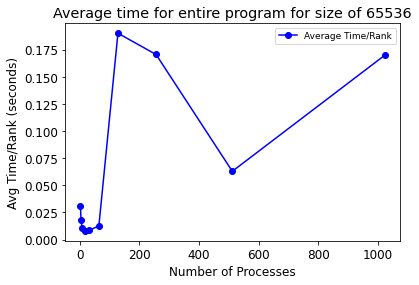

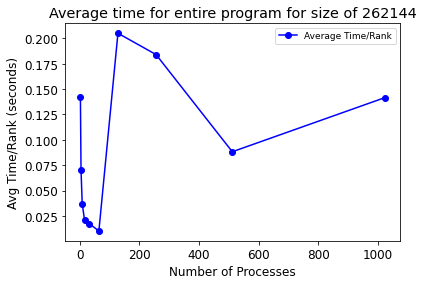

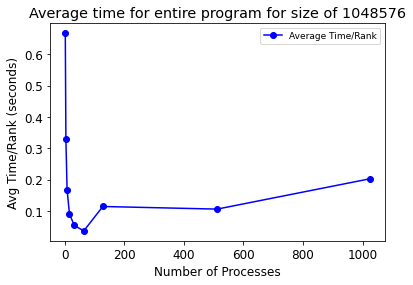

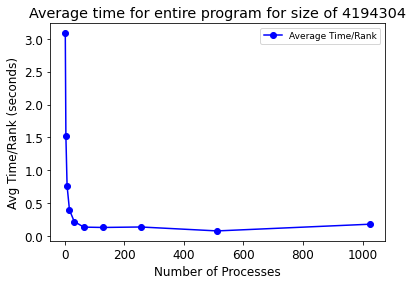

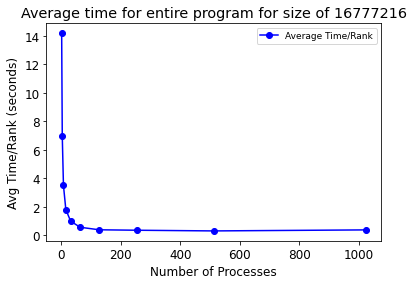

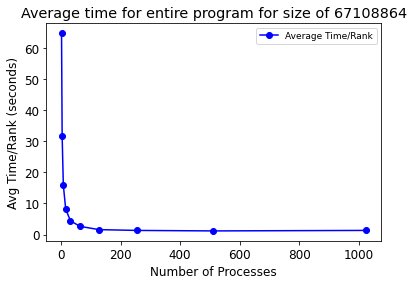

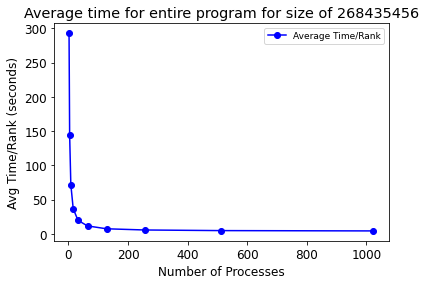

<Figure size 432x288 with 0 Axes>

In [28]:
for node in tk.graph.traverse():
    for m_size in input_sizes:
        if node.frame["name"] in ("main"):
            new_df = tk.dataframe.loc[node]
            x_vals_processes = []
            y_vals_avg = []
            data = new_df.loc[(slice(None), m_size), "Avg time/rank"]
            for process in processes:
                try:
                    temp = data[(process, m_size)]
                    avg = 0
                    counter = 0
                    for val in temp:
                        avg += val
                        counter += 1
                    avg = avg/counter
                    y_vals_avg.append(avg)
                    x_vals_processes.append(process)
                except:
                    pass
            plt.plot(x_vals_processes, y_vals_avg, marker='o', color='blue', label="Average Time/Rank")
            plt.xlabel("Number of Processes")
            plt.ylabel('Avg Time/Rank (seconds)')
            plt.legend(loc=1, prop={'size': 9})
            plt.title(f'Average time for entire program for size of {m_size}')
            plt.show()
            plt.clf()
        

In [ ]:
!tar chvfz notebook.tar.gz results/